In [2]:
import urllib.request
import json
import pandas as pd

propertyid = "Property:P856"
url = (
    "https://www.wikidata.org/w/api.php?action=query&prop=revisions&titles="
    + propertyid
    + "&rvprop=timestamp|comment|ids&rvlimit=500&format=json"
)
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))

In [3]:
array = []

for data in responsedata["query"]["pages"]:
    for revision in responsedata["query"]["pages"][data]["revisions"]:
        print(revision.keys())
        break

dict_keys(['revid', 'parentid', 'timestamp', 'comment'])


In [4]:
result = list(responsedata["query"]["pages"].values())[0]
revisions = result["revisions"]
revision = result["revisions"][0].keys()
revision

dict_keys(['revid', 'parentid', 'timestamp', 'comment'])

In [5]:
array = []

for revision in revisions:
    array.append([revision["timestamp"], revision["comment"]])

In [6]:
array[:1]

[['2025-05-10T11:51:46Z',
  '/* wbsetclaim-update:2||1|2 */ [[Property:P2302]]: [[Q21502404]]']]

In [7]:
dataframe = pd.DataFrame(array, columns=["timestamp", "modification"])
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')
dataframe = dataframe.astype(
    dtype={"modification": "<U1000"}
)

dataframe["timestamp"] = pd.to_datetime(
    dataframe["timestamp"],
    format="%d/%m/%Y",
    unit="D",
    errors="raise",
).dt.normalize()
dataframe

,timestamp,modification
0,2025-05-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
1,2025-05-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
2,2025-05-07,/* wbsetclaim-update:2||1|2 */ [[Property:P230...
3,2025-05-07,/* wbsetclaim-update:2||1|5 */ [[Property:P230...
4,2025-05-07,/* wbsetclaim-update:2||1|3 */ [[Property:P230...
...,...,...
495,2021-03-26,"/* wbsetaliases-add:3|bs */ službeni sajt, zva..."
496,2021-03-26,/* wbsetdescription-add:1|bs */ URL zvanične p...
497,2021-03-26,/* wbsetlabel-set:1|bs */ zvanični sajt
498,2021-03-10,/* wbsetclaim-update:2||1|2 */ [[Property:P230...


In [8]:
group = dataframe.groupby("timestamp").agg("count").reset_index()
group

,timestamp,modification
0,2021-03-10,2
1,2021-03-26,3
2,2021-03-30,1
3,2021-04-03,2
4,2021-04-08,1
...,...,...
225,2025-04-20,3
226,2025-05-04,1
227,2025-05-05,2
228,2025-05-07,12


In [9]:
group.describe()

,timestamp,modification
count,230,230.000000
mean,2023-04-13 10:51:07.826086912,2.173913
min,2021-03-10 00:00:00,1.000000
25%,2022-06-04 12:00:00,1.000000
50%,2023-03-02 12:00:00,1.000000
75%,2024-03-16 18:00:00,2.000000
max,2025-05-10 00:00:00,64.000000
std,NaN,4.586406


In [10]:
group.dtypes

timestamp       datetime64[ns]
modification             int64
dtype: object

In [11]:
group.modification.max()

np.int64(64)

In [12]:
group.modification.min()

np.int64(1)

In [ ]:
#%pip install calplot

     ---------------------------------------- 0.0/132.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/132.3 kB ? eta -:--:--
     ----- ------------------------------- 20.5/132.3 kB 330.3 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/132.3 kB 330.3 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/132.3 kB 365.7 kB/s eta 0:00:01
     ------------------------- ----------- 92.2/132.3 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ 132.3/132.3 kB 521.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8243 sha256=46e655328476003475bb30283354b580d24

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x850 with 6 Axes>,
 array([<Axes: ylabel='2021'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2023'>, <Axes: ylabel='2024'>,
        <Axes: ylabel='2025'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


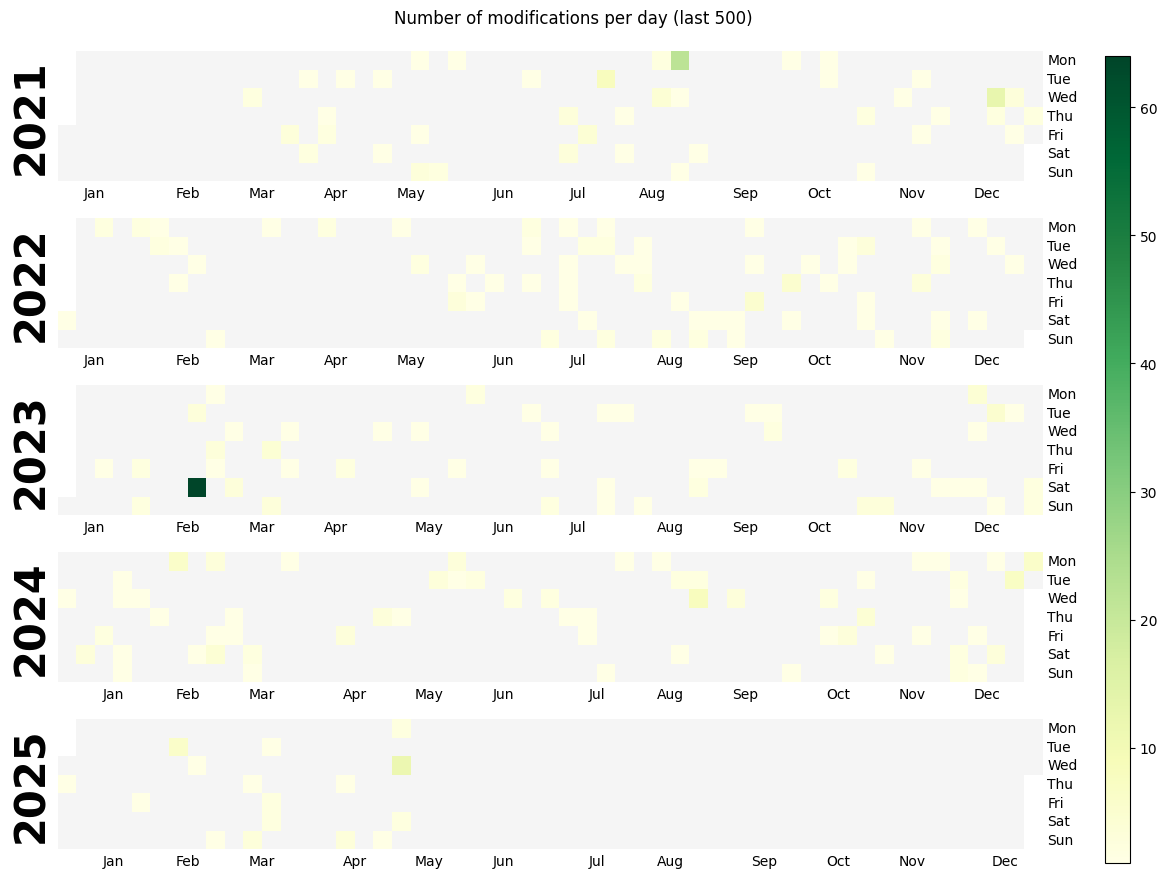

In [17]:
import calplot

days = group["timestamp"]

events = pd.Series(list(group["modification"]), index=days)
calplot.calplot(
    events,
    cmap="YlGn",
    yearlabel_kws={"color": "black"},
    linewidth=0,
    suptitle="Number of modifications per day (last 500)",
)

In [ ]:
#%pip install plotly


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.8 MB 812.7 kB/s eta 0:00:19
   ---------------------------------------- 0.2/14.8 MB 1.5 MB/s eta 0:00:10
    --------------------------------------- 0.3/14.8 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/14.8 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.5/14.8 MB 2.0 MB/s eta 0:00:07
   - -------------------------------------- 0.6/14.8 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.7/14.8 MB 2.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/14.8 MB 2.0 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/14.8 MB 2.1 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/14.8 MB 2.2 MB/s eta 0:00:07
   --- ------------------------------------ 1.1/14.8 MB 2.1 MB/s eta 0:00:07
   --- ---

In [23]:
#%pip install nbformat

import plotly.express as px

fig = px.histogram(
    group,
    x="timestamp",
    y="modification",
    nbins=20,
    labels={"x": "month", "y": "count"},
)
fig.update_layout(bargap=0.2)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import plotly.express as px

fig = px.scatter(
    group, x="timestamp", y="modification", labels={"x": "month", "y": "count"}
)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(group, x="modification", histnorm="probability density", nbins=20)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?heritagesite ?label ?coordinates {
  ?heritagesite wdt:P1435 wd:Q9259;
        wdt:P17 wd:Q142;
        rdfs:label ?label;
        wdt:P625 ?coordinates.
        FILTER (lang(?label)="en")
}
LIMIT 100
"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

array = []
for result in results["results"]["bindings"]:
    array.append(
        [
            result["heritagesite"]["value"],
            result["label"]["value"],
            result["coordinates"]["value"],
        ]
    )

In [ ]:
from shapely import wkt
import geopandas as gp

dataframe = pd.DataFrame(array, columns=["ID", "label", "coordinates"])
dataframe["coordinates"] = dataframe["coordinates"].apply(wkt.loads)

geodataframe = gp.GeoDataFrame(dataframe, geometry="coordinates")

In [ ]:
array[:1]

In [ ]:
geodataframe.dtypes

In [ ]:
import folium

map = folium.Map(location=[45.1093, 2.6753], zoom_start=6)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geodataframe.geometry]

In [ ]:
i = 0
for coordinates in geo_df_list:
    map.add_child(
        folium.Marker(
            location=coordinates,
            icon=folium.Icon(color="green"),
            popup="Wikidata: <a target='_blank' href='"
            + str(geodataframe.ID[i])
            + "'>"
            + str(geodataframe.label[i]),
        )
    )
    i = i + 1

map